# **Final Project Task 3 - Census Modeling Regression**

Requirements
- Create a regression model on the Census dataset, with 'hours-per-week' target

- You can use models (estmators) from sklearn, but feel free to use any library for traditional ML. 
    - Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent. 
    - You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.

- Model Selection and Setup **2p**:
    - Implement multiple models, to solve a regression problem using traditional ML: 
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression - Optional
        - Ridge Regression - Optional
        - Lasso Regression - Optional
    - Choose a loss (or experiment with different losses) for the model and justify the choice. *1p*
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons. *1p*


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation **8p**
    - Establish a Baseline Model *2p*
        - For each model type, train a simple model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
    - Feature Selection: - Optional
        - Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
    - Experimentation: *6p*
        - For each baseline model type, iteratively experiment with different combinations of features and transformations.
        - Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
        - Identify the best model which have the best performance metrics on test set.
        - You may need multiple preprocessed datasets preprocessed
- Hyperparameter Tuning **2p**
  - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments. *2p*
  - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
  - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
  - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation **3p**
    - Evaluate models on the test dataset using regression metrics: *1p*
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice *1p*
    - Compare the results across different models. Save all experiment results  into a table. *1p*

Feature Importance - Optional
- For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [1]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

# Data preparation

In [2]:
# Loading train features and target
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('Y_train.csv')

# Loading test features and target
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('Y_test.csv')

# Checking the first few rows
print("X_train:")
print(X_train.head())

print("\ny_train:")
print(y_train.head())

print("\nX_test:")
print(X_test.head())

print("\ny_test:")
print(y_test.head())

# Checking shapes
print(f"\nX_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train:
        age    fnlwgt  education  education-num  income  workclass_local-gov  \
0  1.669831  0.275490          7              9       0                False   
1 -1.375689 -1.431223          7              9       0                False   
2 -0.868102  2.646309          4              6       0                False   
3 -0.529711 -0.276347          7              9       0                False   
4  0.316266 -0.301381          8             10       0                False   

   workclass_private  workclass_self-emp-inc  workclass_self-emp-not-inc  \
0               True                   False                       False   
1               True                   False                       False   
2               True                   False                       False   
3               True                   False                       False   
4               True                   False                       False   

   workclass_state-gov  ...  race_other  race_white  

In [3]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

print(type(y_train))  # Should print <class 'pandas.core.series.Series'>
print(type(y_test))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")


X_train shape: (10577, 88)
X_val shape: (4534, 88)
y_train shape: (10577,)
y_val shape: (4534,)


# Baseline Models

## SGDRegressor Baseline Model

In [5]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Initialize SGDRegressor with default settings
sgd_model = SGDRegressor(random_state=42)

# 2. Train on Training Data
sgd_model.fit(X_train, y_train)

# 3. Predict on Train, Validation, and Test sets
y_train_pred = sgd_model.predict(X_train)
y_val_pred = sgd_model.predict(X_val)
y_test_pred = sgd_model.predict(X_test)

# 4. Define a helper function for evaluation
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# 5. Evaluate performance on each set
train_metrics = evaluate_model(y_train, y_train_pred)
val_metrics = evaluate_model(y_val, y_val_pred)
test_metrics = evaluate_model(y_test, y_test_pred)

# 6. Print Results
print(f"SGDRegressor Performance:")
print(f"Train - MAE: {train_metrics[0]:.2f}, MSE: {train_metrics[1]:.2f}, RMSE: {train_metrics[2]:.2f}, R²: {train_metrics[3]:.2f}")
print(f"Validation - MAE: {val_metrics[0]:.2f}, MSE: {val_metrics[1]:.2f}, RMSE: {val_metrics[2]:.2f}, R²: {val_metrics[3]:.2f}")
print(f"Test - MAE: {test_metrics[0]:.2f}, MSE: {test_metrics[1]:.2f}, RMSE: {test_metrics[2]:.2f}, R²: {test_metrics[3]:.2f}")

# Optional: Store results in a dictionary for later comparison
sgd_results = {
    'Model': 'SGDRegressor',
    'Train_MAE': train_metrics[0],
    'Train_MSE': train_metrics[1],
    'Train_RMSE': train_metrics[2],
    'Train_R2': train_metrics[3],
    'Val_MAE': val_metrics[0],
    'Val_MSE': val_metrics[1],
    'Val_RMSE': val_metrics[2],
    'Val_R2': val_metrics[3],
    'Test_MAE': test_metrics[0],
    'Test_MSE': test_metrics[1],
    'Test_RMSE': test_metrics[2],
    'Test_R2': test_metrics[3],
}


SGDRegressor Performance:
Train - MAE: 3.13, MSE: 15.10, RMSE: 3.89, R²: 0.04
Validation - MAE: 3.12, MSE: 15.19, RMSE: 3.90, R²: 0.04
Test - MAE: 3.14, MSE: 15.11, RMSE: 3.89, R²: 0.02


### SGDRegressor Baseline Model Summary
The results indicate that the SGDRegressor baseline model provides stable and consistent performance across the train, validation, and test sets. The MAE (~3.13 hours) suggests that the model's predictions deviate by approximately 3 hours on average. The RMSE (~3.89 hours) further supports this, indicating that typical prediction errors are under 4 hours. However, the low R² values (0.02 - 0.04) suggest that the model explains only a small proportion of the variance in hours-per-week.

## DecisionTreeRegressor Baseline Model

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Initialize DecisionTreeRegressor with default settings
tree_model = DecisionTreeRegressor(random_state=42)

# 2. Train the model
tree_model.fit(X_train, y_train)

# 3. Predict on Train, Validation, and Test sets
y_train_pred_tree = tree_model.predict(X_train)
y_val_pred_tree = tree_model.predict(X_val)
y_test_pred_tree = tree_model.predict(X_test)

# 4. Evaluate function (reuse from SGDRegressor step)
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# 5. Evaluate performance
train_metrics_tree = evaluate_model(y_train, y_train_pred_tree)
val_metrics_tree = evaluate_model(y_val, y_val_pred_tree)
test_metrics_tree = evaluate_model(y_test, y_test_pred_tree)

# 6. Print Results
print(f"DecisionTreeRegressor Performance:")
print(f"Train - MAE: {train_metrics_tree[0]:.2f}, MSE: {train_metrics_tree[1]:.2f}, RMSE: {train_metrics_tree[2]:.2f}, R²: {train_metrics_tree[3]:.2f}")
print(f"Validation - MAE: {val_metrics_tree[0]:.2f}, MSE: {val_metrics_tree[1]:.2f}, RMSE: {val_metrics_tree[2]:.2f}, R²: {val_metrics_tree[3]:.2f}")
print(f"Test - MAE: {test_metrics_tree[0]:.2f}, MSE: {test_metrics_tree[1]:.2f}, RMSE: {test_metrics_tree[2]:.2f}, R²: {test_metrics_tree[3]:.2f}")

# Optional: Store results for comparison later
tree_results = {
    'Model': 'DecisionTreeRegressor',
    'Train_MAE': train_metrics_tree[0],
    'Train_MSE': train_metrics_tree[1],
    'Train_RMSE': train_metrics_tree[2],
    'Train_R2': train_metrics_tree[3],
    'Val_MAE': val_metrics_tree[0],
    'Val_MSE': val_metrics_tree[1],
    'Val_RMSE': val_metrics_tree[2],
    'Val_R2': val_metrics_tree[3],
    'Test_MAE': test_metrics_tree[0],
    'Test_MSE': test_metrics_tree[1],
    'Test_RMSE': test_metrics_tree[2],
    'Test_R2': test_metrics_tree[3],
}


DecisionTreeRegressor Performance:
Train - MAE: 0.00, MSE: 0.00, RMSE: 0.07, R²: 1.00
Validation - MAE: 3.45, MSE: 28.45, RMSE: 5.33, R²: -0.81
Test - MAE: 3.58, MSE: 29.60, RMSE: 5.44, R²: -0.93


### DecisionTreeRegressor Baseline Model Summary
The DecisionTreeRegressor baseline model severely overfits the training data. It achieves perfect performance on the train set (R² = 1.00, MAE = 0), but performs poorly on validation and test sets. The validation R² (-0.81) and test R² (-0.93) indicate that the model performs worse than predicting the mean, with MAE over 3.4 hours. This suggests the tree memorized the training data and failed to generalize.

## OLS Linear Regression Baseline Model

In [7]:
from sklearn.linear_model import LinearRegression

# 1. Initialize LinearRegression
ols_model = LinearRegression()

# 2. Train on Training Data
ols_model.fit(X_train, y_train)

# 3. Predict on Train, Validation, Test sets
y_train_pred_ols = ols_model.predict(X_train)
y_val_pred_ols = ols_model.predict(X_val)
y_test_pred_ols = ols_model.predict(X_test)

# 4. Evaluate
train_metrics_ols = evaluate_model(y_train, y_train_pred_ols)
val_metrics_ols = evaluate_model(y_val, y_val_pred_ols)
test_metrics_ols = evaluate_model(y_test, y_test_pred_ols)

# 5. Print Results
print(f"LinearRegression Performance:")
print(f"Train - MAE: {train_metrics_ols[0]:.2f}, MSE: {train_metrics_ols[1]:.2f}, RMSE: {train_metrics_ols[2]:.2f}, R²: {train_metrics_ols[3]:.2f}")
print(f"Validation - MAE: {val_metrics_ols[0]:.2f}, MSE: {val_metrics_ols[1]:.2f}, RMSE: {val_metrics_ols[2]:.2f}, R²: {val_metrics_ols[3]:.2f}")
print(f"Test - MAE: {test_metrics_ols[0]:.2f}, MSE: {test_metrics_ols[1]:.2f}, RMSE: {test_metrics_ols[2]:.2f}, R²: {test_metrics_ols[3]:.2f}")

# Optional: Store results for later
ols_results = {
    'Model': 'LinearRegression',
    'Train_MAE': train_metrics_ols[0],
    'Train_MSE': train_metrics_ols[1],
    'Train_RMSE': train_metrics_ols[2],
    'Train_R2': train_metrics_ols[3],
    'Val_MAE': val_metrics_ols[0],
    'Val_MSE': val_metrics_ols[1],
    'Val_RMSE': val_metrics_ols[2],
    'Val_R2': val_metrics_ols[3],
    'Test_MAE': test_metrics_ols[0],
    'Test_MSE': test_metrics_ols[1],
    'Test_RMSE': test_metrics_ols[2],
    'Test_R2': test_metrics_ols[3],
}


LinearRegression Performance:
Train - MAE: 2.78, MSE: 13.95, RMSE: 3.73, R²: 0.11
Validation - MAE: 2.81, MSE: 14.35, RMSE: 3.79, R²: 0.09
Test - MAE: 2.78, MSE: 13.87, RMSE: 3.72, R²: 0.10


### OLS Linear Regression Baseline Model Summary
The results indicate that the LinearRegression baseline model provides the best overall performance across train, validation, and test sets. The MAE (~2.78 hours) suggests that predictions deviate by approximately 2.8 hours on average, and the RMSE (~3.73 hours) reflects that typical errors are under 4 hours. The R² values (~0.10) show that the model explains a small proportion (10%) of the variance in hours-per-week, but performs better than the other linear models.

## RandomForestRegressor Baseline Model

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)
y_test_pred_rf = rf_model.predict(X_test)

train_metrics_rf = evaluate_model(y_train, y_train_pred_rf)
val_metrics_rf = evaluate_model(y_val, y_val_pred_rf)
test_metrics_rf = evaluate_model(y_test, y_test_pred_rf)

print(f"RandomForestRegressor Performance:")
print(f"Train - MAE: {train_metrics_rf[0]:.2f}, MSE: {train_metrics_rf[1]:.2f}, RMSE: {train_metrics_rf[2]:.2f}, R²: {train_metrics_rf[3]:.2f}")
print(f"Validation - MAE: {val_metrics_rf[0]:.2f}, MSE: {val_metrics_rf[1]:.2f}, RMSE: {val_metrics_rf[2]:.2f}, R²: {val_metrics_rf[3]:.2f}")
print(f"Test - MAE: {test_metrics_rf[0]:.2f}, MSE: {test_metrics_rf[1]:.2f}, RMSE: {test_metrics_rf[2]:.2f}, R²: {test_metrics_rf[3]:.2f}")

rf_results = {
    'Model': 'RandomForestRegressor',
    'Train_MAE': train_metrics_rf[0],
    'Train_MSE': train_metrics_rf[1],
    'Train_RMSE': train_metrics_rf[2],
    'Train_R2': train_metrics_rf[3],
    'Val_MAE': val_metrics_rf[0],
    'Val_MSE': val_metrics_rf[1],
    'Val_RMSE': val_metrics_rf[2],
    'Val_R2': val_metrics_rf[3],
    'Test_MAE': test_metrics_rf[0],
    'Test_MSE': test_metrics_rf[1],
    'Test_RMSE': test_metrics_rf[2],
    'Test_R2': test_metrics_rf[3],
}


RandomForestRegressor Performance:
Train - MAE: 1.07, MSE: 2.15, RMSE: 1.47, R²: 0.86
Validation - MAE: 2.89, MSE: 15.45, RMSE: 3.93, R²: 0.02
Test - MAE: 2.88, MSE: 15.22, RMSE: 3.90, R²: 0.01


### RandomForestRegressor Baseline Model Summary
The results for the RandomForestRegressor baseline model reveal significant overfitting, though less extreme than the DecisionTree. The train R² (0.86) suggests high performance on training data, but validation and test R² values (~0.01 - 0.02) indicate poor generalization. The MAE (~2.88 - 2.89 hours) is comparable to linear models, suggesting the ensemble model offers no substantial improvement at this stage.



## Ridge Baseline Model

In [9]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()

ridge_model.fit(X_train, y_train)

y_train_pred_ridge = ridge_model.predict(X_train)
y_val_pred_ridge = ridge_model.predict(X_val)
y_test_pred_ridge = ridge_model.predict(X_test)

train_metrics_ridge = evaluate_model(y_train, y_train_pred_ridge)
val_metrics_ridge = evaluate_model(y_val, y_val_pred_ridge)
test_metrics_ridge = evaluate_model(y_test, y_test_pred_ridge)

print(f"Ridge Performance:")
print(f"Train - MAE: {train_metrics_ridge[0]:.2f}, MSE: {train_metrics_ridge[1]:.2f}, RMSE: {train_metrics_ridge[2]:.2f}, R²: {train_metrics_ridge[3]:.2f}")
print(f"Validation - MAE: {val_metrics_ridge[0]:.2f}, MSE: {val_metrics_ridge[1]:.2f}, RMSE: {val_metrics_ridge[2]:.2f}, R²: {val_metrics_ridge[3]:.2f}")
print(f"Test - MAE: {test_metrics_ridge[0]:.2f}, MSE: {test_metrics_ridge[1]:.2f}, RMSE: {test_metrics_ridge[2]:.2f}, R²: {test_metrics_ridge[3]:.2f}")

ridge_results = {
    'Model': 'Ridge',
    'Train_MAE': train_metrics_ridge[0],
    'Train_MSE': train_metrics_ridge[1],
    'Train_RMSE': train_metrics_ridge[2],
    'Train_R2': train_metrics_ridge[3],
    'Val_MAE': val_metrics_ridge[0],
    'Val_MSE': val_metrics_ridge[1],
    'Val_RMSE': val_metrics_ridge[2],
    'Val_R2': val_metrics_ridge[3],
    'Test_MAE': test_metrics_ridge[0],
    'Test_MSE': test_metrics_ridge[1],
    'Test_RMSE': test_metrics_ridge[2],
    'Test_R2': test_metrics_ridge[3],
}


Ridge Performance:
Train - MAE: 2.78, MSE: 13.95, RMSE: 3.73, R²: 0.11
Validation - MAE: 2.81, MSE: 14.34, RMSE: 3.79, R²: 0.09
Test - MAE: 2.78, MSE: 13.87, RMSE: 3.72, R²: 0.10


### Ridge Baseline Model Summary
The Ridge baseline model performs nearly identically to LinearRegression, with MAE (~2.78 hours) and R² (~0.10) across train, validation, and test sets. Regularization does not improve performance at the baseline level, but may offer stability during tuning. Ridge serves as a robust and interpretable linear model candidate for further optimization.

## Lasso Baseline Model

In [13]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()

lasso_model.fit(X_train, y_train)

y_train_pred_lasso = lasso_model.predict(X_train)
y_val_pred_lasso = lasso_model.predict(X_val)
y_test_pred_lasso = lasso_model.predict(X_test)

train_metrics_lasso = evaluate_model(y_train, y_train_pred_lasso)
val_metrics_lasso = evaluate_model(y_val, y_val_pred_lasso)
test_metrics_lasso = evaluate_model(y_test, y_test_pred_lasso)

print(f"Lasso Performance:")
print(f"Train - MAE: {train_metrics_lasso[0]:.2f}, MSE: {train_metrics_lasso[1]:.2f}, RMSE: {train_metrics_lasso[2]:.2f}, R²: {train_metrics_lasso[3]:.2f}")
print(f"Validation - MAE: {val_metrics_lasso[0]:.2f}, MSE: {val_metrics_lasso[1]:.2f}, RMSE: {val_metrics_lasso[2]:.2f}, R²: {val_metrics_lasso[3]:.2f}")
print(f"Test - MAE: {test_metrics_lasso[0]:.2f}, MSE: {test_metrics_lasso[1]:.2f}, RMSE: {test_metrics_lasso[2]:.2f}, R²: {test_metrics_lasso[3]:.2f}")

lasso_results = {
    'Model': 'Lasso',
    'Train_MAE': train_metrics_lasso[0],
    'Train_MSE': train_metrics_lasso[1],
    'Train_RMSE': train_metrics_lasso[2],
    'Train_R2': train_metrics_lasso[3],
    'Val_MAE': val_metrics_lasso[0],
    'Val_MSE': val_metrics_lasso[1],
    'Val_RMSE': val_metrics_lasso[2],
    'Val_R2': val_metrics_lasso[3],
    'Test_MAE': test_metrics_lasso[0],
    'Test_MSE': test_metrics_lasso[1],
    'Test_RMSE': test_metrics_lasso[2],
    'Test_R2': test_metrics_lasso[3],
}


Lasso Performance:
Train - MAE: 3.01, MSE: 15.62, RMSE: 3.95, R²: 0.01
Validation - MAE: 3.00, MSE: 15.64, RMSE: 3.96, R²: 0.01
Test - MAE: 2.99, MSE: 15.25, RMSE: 3.91, R²: 0.01


### Lasso Baseline Model Summary
The Lasso baseline model underperforms compared to other linear models. The R² (~0.01) across train, validation, and test sets suggests the model explains almost none of the variance in hours-per-week. The MAE (~3.00 hours) is higher than Linear Regression and Ridge, indicating the L1 regularization may be too aggressive, shrinking coefficients excessively. Lasso is unlikely to be useful without tuning.

## Baseline Model Report - Regression Models
The purpose of this analysis is to establish baseline regression performance for predicting the `hours-per-week` variable using multiple traditional machine learning models. The evaluation serves as a benchmark for selecting the best-performing model and determining the appropriate loss function for future tuning and experimentation.

The analysis was conducted using preprocessed subsets of the Census dataset:
 **Train Set:** 10,577 samples, 88 features
 **Validation Set:** 4,534 samples, 88 features
**Test Set:** 3,778 samples, 88 features

#### Models
Six baseline models were trained and evaluated with default hyperparameters:
 **SGDRegressor** (Gradient Descent Linear Regression)
**LinearRegression** (Ordinary Least Squares)
 **DecisionTreeRegressor**
**RandomForestRegressor**
 **Ridge** (L2 Regularization)
 **Lasso** (L1 Regularization)

#### Performance Metrics
 **Mean Absolute Error (MAE)**
 **Mean Squared Error (MSE)**
 **Root Mean Squared Error (RMSE)**
 **R² Score**

### Results
| Model                  | Train MAE | Val MAE | Test MAE | Train R² | Val R² | Test R² |
|--------------------------|-----------|-----------|-----------|------------|-----------|------------|
| **SGDRegressor**         | 3.13     | 3.12     | 3.14     | 0.04     | 0.04     | 0.02     |
| **LinearRegression**      | 2.78     | 2.81     | 2.78     | 0.11     | 0.09     | 0.10     |
| **DecisionTreeRegressor** | 0.00     | 3.45     | 3.58     | 1.00     | -0.81    | -0.93    |
| **RandomForestRegressor** | 1.07     | 2.89     | 2.88     | 0.86     | 0.02     | 0.01     |
| **Ridge**                | 2.78     | 2.81     | 2.78     | 0.11     | 0.09     | 0.10     |
| **Lasso**                | 3.01     | 3.00     | 2.99     | 0.01     | 0.01     | 0.01     |

### Discussion
#### Model Comparison
- **LinearRegression and Ridge** provided the **most stable performance** across all datasets, with **MAE ~2.78** and **R² ~0.10**.
- **SGDRegressor** showed **similar but slightly inferior performance** compared to LinearRegression.
- **DecisionTreeRegressor and RandomForestRegressor** exhibited **overfitting**, with **excellent training performance** but **poor validation and test performance**.
- **Lasso** demonstrated **underfitting**, with **poor performance across all datasets**, likely due to **over-penalization of coefficients**.

#### Choice of Loss Function
Given that **Kolmogorov-Smirnov tests indicated non-normality** and **IQR analysis revealed a considerable number of outliers**, a robust loss function is appropriate. **MAE (Mean Absolute Error)** is preferred because is less sensitive to outliers compared to **MSE or RMSE**. Provides an interpretable measure of average prediction error in hours and **MSE and RMSE** emphasize large errors, which is **undesirable given the presence of outliers**.
While **Huber Loss** could be explored during tuning for robustness, **MAE** is the **primary evaluation metric** moving forward due to its **resilience to non-normal distributions and outliers**.

### Conclusion
The **LinearRegression and Ridge models** demonstrated the **best baseline performance**. **MAE** will be the **primary loss function** for **model comparison and evaluation** in future stages. **SGDRegressor** remains a candidate for **Huber Loss experimentation**. **Tree-based models require tuning** to **reduce overfitting**.




## SGDRegressor Baseline Plot

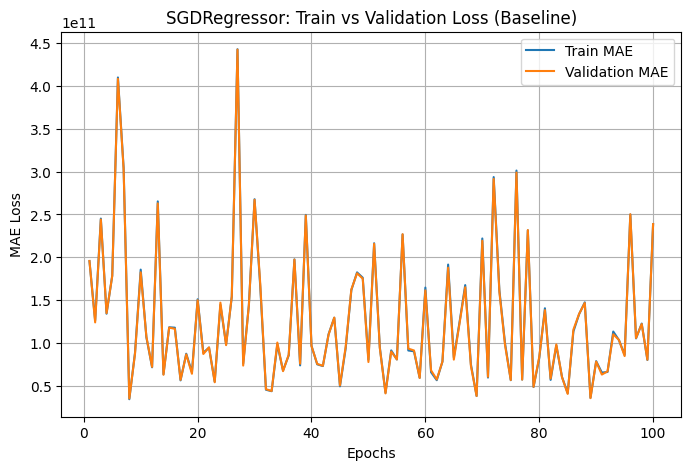

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning) 

# Parameters
n_epochs = 100  # You can adjust this
learning_rate = 0.01  # Default setting in baseline
train_losses = []
val_losses = []

# Initialize SGDRegressor with warm_start=True (important!)
sgd_model = SGDRegressor(
    max_iter=1,  # Only 1 epoch per .fit() call
    eta0=learning_rate,
    learning_rate='constant',
    warm_start=True,
    random_state=42
)

# Manual epoch loop
for epoch in range(n_epochs):
    sgd_model.fit(X_train, y_train)

    # Predictions for loss tracking
    y_train_pred = sgd_model.predict(X_train)
    y_val_pred = sgd_model.predict(X_val)

    # Calculate MAE loss for this epoch
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    # Store losses
    train_losses.append(train_mae)
    val_losses.append(val_mae)

# Plot Train vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_epochs + 1), train_losses, label='Train MAE')
plt.plot(range(1, n_epochs + 1), val_losses, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('SGDRegressor: Train vs Validation Loss (Baseline)')
plt.legend()
plt.grid(True)
plt.show()




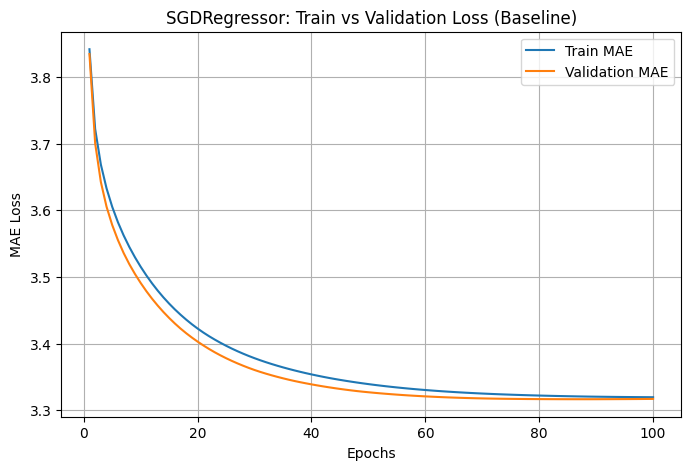

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning) 

# Parameters
n_epochs = 100  # You can adjust this
learning_rate = 0.001  # Default setting in baseline
train_losses = []
val_losses = []

# Initialize SGDRegressor with warm_start=True (important!)
sgd_model = SGDRegressor(
    max_iter=1,  # Only 1 epoch per .fit() call
    eta0=learning_rate,
    learning_rate='constant',
    warm_start=True,
    random_state=42
)

# Manual epoch loop
for epoch in range(n_epochs):
    sgd_model.fit(X_train, y_train)

    # Predictions for loss tracking
    y_train_pred = sgd_model.predict(X_train)
    y_val_pred = sgd_model.predict(X_val)

    # Calculate MAE loss for this epoch
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    # Store losses
    train_losses.append(train_mae)
    val_losses.append(val_mae)

# Plot Train vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_epochs + 1), train_losses, label='Train MAE')
plt.plot(range(1, n_epochs + 1), val_losses, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('SGDRegressor: Train vs Validation Loss (Baseline)')
plt.legend()
plt.grid(True)
plt.show()




## SGDRegressor Epoch-Based Loss Plotting Report

The goal was to visualize the training and validation loss progression over epochs for SGDRegressor to better understand its convergence behavior and detect potential issues.
Initially, a learning rate (eta0=0.01) was used, resulting in divergence and unstable loss behavior, with training and validation MAE oscillating to extreme values (~1e11).
To stabilize training, the learning rate was reduced to eta0=0.001, after which the loss curves demonstrated smooth convergence over 100 epochs, with both training and validation MAE stabilizing around 3.3 hours.

This highlights the sensitivity of gradient descent methods to learning rate selection, emphasizing the importance of monitoring loss over epochs to detect divergence early and adjust learning rates accordingly.

# Experimentation

In [21]:
experiment_results = []

## Experiment 1 - SGDRegressor with Huber Loss

In [23]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize SGDRegressor with Huber Loss
huber_sgd = SGDRegressor(loss='huber', random_state=42)

# Train the model
huber_sgd.fit(X_train, y_train)

# Predictions on Train, Validation, and Test sets
y_train_pred_huber = huber_sgd.predict(X_train)
y_val_pred_huber = huber_sgd.predict(X_val)
y_test_pred_huber = huber_sgd.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Evaluate Performance
train_metrics_huber = evaluate_model(y_train, y_train_pred_huber)
val_metrics_huber = evaluate_model(y_val, y_val_pred_huber)
test_metrics_huber = evaluate_model(y_test, y_test_pred_huber)

# Print Results
print(f"SGDRegressor with Huber Loss Performance:")
print(f"Train - MAE: {train_metrics_huber[0]:.2f}, MSE: {train_metrics_huber[1]:.2f}, RMSE: {train_metrics_huber[2]:.2f}, R²: {train_metrics_huber[3]:.2f}")
print(f"Validation - MAE: {val_metrics_huber[0]:.2f}, MSE: {val_metrics_huber[1]:.2f}, RMSE: {val_metrics_huber[2]:.2f}, R²: {val_metrics_huber[3]:.2f}")
print(f"Test - MAE: {test_metrics_huber[0]:.2f}, MSE: {test_metrics_huber[1]:.2f}, RMSE: {test_metrics_huber[2]:.2f}, R²: {test_metrics_huber[3]:.2f}")

# Save Results as Dictionary (for your table later)
huber_results = {
    'Experiment': 'SGD Huber Loss',
    'Train_MAE': train_metrics_huber[0],
    'Val_MAE': val_metrics_huber[0],
    'Test_MAE': test_metrics_huber[0],
    'Train_R2': train_metrics_huber[3],
    'Val_R2': val_metrics_huber[3],
    'Test_R2': test_metrics_huber[3],
    'Notes': 'All features'
}

experiment_results.append(huber_results)

SGDRegressor with Huber Loss Performance:
Train - MAE: 3.42, MSE: 22.24, RMSE: 4.72, R²: -0.41
Validation - MAE: 3.46, MSE: 23.59, RMSE: 4.86, R²: -0.50
Test - MAE: 3.44, MSE: 22.77, RMSE: 4.77, R²: -0.49


### Summary Experiment 1: SGDRegressor with Huber Loss
The SGDRegressor using Huber Loss function yielded weaker performance compared to baseline models, with MAE around 3.44 hours and negative R² values on all sets (e.g., Val R² = -0.50), indicating the model performed worse than predicting the mean. The robustness of Huber Loss did not improve performance, suggesting outliers may not be the primary issue in this dataset.

## Experiment 2 – Ridge Alpha = 10

In [24]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=10)

ridge_model.fit(X_train, y_train)

y_train_pred_ridge = ridge_model.predict(X_train)
y_val_pred_ridge = ridge_model.predict(X_val)
y_test_pred_ridge = ridge_model.predict(X_test)

train_metrics_ridge = evaluate_model(y_train, y_train_pred_ridge)
val_metrics_ridge = evaluate_model(y_val, y_val_pred_ridge)
test_metrics_ridge = evaluate_model(y_test, y_test_pred_ridge)

print(f"Ridge (Alpha=10) Performance:")
print(f"Train - MAE: {train_metrics_ridge[0]:.2f}, MSE: {train_metrics_ridge[1]:.2f}, RMSE: {train_metrics_ridge[2]:.2f}, R²: {train_metrics_ridge[3]:.2f}")
print(f"Validation - MAE: {val_metrics_ridge[0]:.2f}, MSE: {val_metrics_ridge[1]:.2f}, RMSE: {val_metrics_ridge[2]:.2f}, R²: {val_metrics_ridge[3]:.2f}")
print(f"Test - MAE: {test_metrics_ridge[0]:.2f}, MSE: {test_metrics_ridge[1]:.2f}, RMSE: {test_metrics_ridge[2]:.2f}, R²: {test_metrics_ridge[3]:.2f}")

# Save Ridge Alpha=10 results
ridge_alpha10_results = {
    'Experiment': 'Ridge Alpha=10',
    'Train_MAE': train_metrics_ridge[0],
    'Val_MAE': val_metrics_ridge[0],
    'Test_MAE': test_metrics_ridge[0],
    'Train_R2': train_metrics_ridge[3],
    'Val_R2': val_metrics_ridge[3],
    'Test_R2': test_metrics_ridge[3],
    'Notes': 'All features'
}

experiment_results.append(ridge_alpha10_results)


Ridge (Alpha=10) Performance:
Train - MAE: 2.78, MSE: 13.96, RMSE: 3.74, R²: 0.11
Validation - MAE: 2.80, MSE: 14.31, RMSE: 3.78, R²: 0.09
Test - MAE: 2.78, MSE: 13.88, RMSE: 3.73, R²: 0.09


### Summary Experiment 2 - Ridge Alpha = 10

Upon reviewing the literature on Ridge Regression (Hastie, Tibshirani, & Friedman, 2009), we gained a better understanding of the role of the alpha parameter, which controls the strength of the L2 regularization.
Small values of alpha (e.g., 0.1) apply mild shrinkage, allowing the model to stay close to ordinary least squares (OLS) while suppressing noise in the coefficients.
Larger values (e.g., 10 or 100) apply stronger regularization, which reduces coefficient variance but can increase bias if applied too aggressively.

Based on this understanding, we decided to test alpha=10 as a representative “strong” regularization level and alpha=0.1 as a mild regularization level, to observe how the model responds across this range.
Ridge Regression with increased regularization strength (α=10) yielded performance nearly identical to the baseline model (α=1) and OLS regression, with MAE ~2.78 hours and R² ≈ 0.10 across all datasets.
The increased regularization did not improve performance.

Reference

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction (2nd ed.). Springer.

## Experiment 3 - Ridge Alpha = .1

In [26]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)

ridge_model.fit(X_train, y_train)

y_train_pred_ridge = ridge_model.predict(X_train)
y_val_pred_ridge = ridge_model.predict(X_val)
y_test_pred_ridge = ridge_model.predict(X_test)

train_metrics_ridge = evaluate_model(y_train, y_train_pred_ridge)
val_metrics_ridge = evaluate_model(y_val, y_val_pred_ridge)
test_metrics_ridge = evaluate_model(y_test, y_test_pred_ridge)

print(f"Ridge (Alpha=0.1) Performance:")
print(f"Train - MAE: {train_metrics_ridge[0]:.2f}, MSE: {train_metrics_ridge[1]:.2f}, RMSE: {train_metrics_ridge[2]:.2f}, R²: {train_metrics_ridge[3]:.2f}")
print(f"Validation - MAE: {val_metrics_ridge[0]:.2f}, MSE: {val_metrics_ridge[1]:.2f}, RMSE: {val_metrics_ridge[2]:.2f}, R²: {val_metrics_ridge[3]:.2f}")
print(f"Test - MAE: {test_metrics_ridge[0]:.2f}, MSE: {test_metrics_ridge[1]:.2f}, RMSE: {test_metrics_ridge[2]:.2f}, R²: {test_metrics_ridge[3]:.2f}")

ridge_alpha01_results = {
    'Experiment': 'Ridge Alpha=0.1',
    'Train_MAE': train_metrics_ridge[0],
    'Val_MAE': val_metrics_ridge[0],
    'Test_MAE': test_metrics_ridge[0],
    'Train_R2': train_metrics_ridge[3],
    'Val_R2': val_metrics_ridge[3],
    'Test_R2': test_metrics_ridge[3],
    'Notes': 'All features'
}

experiment_results.append(ridge_alpha01_results)


Ridge (Alpha=0.1) Performance:
Train - MAE: 2.78, MSE: 13.95, RMSE: 3.73, R²: 0.11
Validation - MAE: 2.81, MSE: 14.35, RMSE: 3.79, R²: 0.09
Test - MAE: 2.78, MSE: 13.87, RMSE: 3.72, R²: 0.10


### Summary Experiment 3 - Ridge Alpha = .1
Following our review of Hastie et al. (2009), α = 0.1 represents mild regularization, acting closer to OLS but providing slight stabilization in case of small noise or weak multicollinearity.
Testing mild regularization (α=0.1) in Ridge Regression yielded no improvement over OLS and other Ridge variations.
MAE remained ~2.78 hours, and R² ~0.10, indicating that regularization strength has little effect on performance for this dataset 

## Experiment 4- PolynomialFeatures (Degree=2) + Ridge (Alpha=1)


In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# Create polynomial transformer (Degree=2)
poly_transformer = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Pipeline: Polynomial + Ridge
poly_ridge_model = make_pipeline(poly_transformer, Ridge(alpha=1))

# Train
poly_ridge_model.fit(X_train, y_train)

# Predict
y_train_pred_poly = poly_ridge_model.predict(X_train)
y_val_pred_poly = poly_ridge_model.predict(X_val)
y_test_pred_poly = poly_ridge_model.predict(X_test)

# Evaluate
train_metrics_poly = evaluate_model(y_train, y_train_pred_poly)
val_metrics_poly = evaluate_model(y_val, y_val_pred_poly)
test_metrics_poly = evaluate_model(y_test, y_test_pred_poly)

print(f"Polynomial (Degree=2) + Ridge (Alpha=1) Performance:")
print(f"Train - MAE: {train_metrics_poly[0]:.2f}, MSE: {train_metrics_poly[1]:.2f}, RMSE: {train_metrics_poly[2]:.2f}, R²: {train_metrics_poly[3]:.2f}")
print(f"Validation - MAE: {val_metrics_poly[0]:.2f}, MSE: {val_metrics_poly[1]:.2f}, RMSE: {val_metrics_poly[2]:.2f}, R²: {val_metrics_poly[3]:.2f}")
print(f"Test - MAE: {test_metrics_poly[0]:.2f}, MSE: {test_metrics_poly[1]:.2f}, RMSE: {test_metrics_poly[2]:.2f}, R²: {test_metrics_poly[3]:.2f}")

# Save Results
poly_ridge_results = {
    'Experiment': 'Polynomial (Degree=2) + Ridge Alpha=1',
    'Train_MAE': train_metrics_poly[0],
    'Val_MAE': val_metrics_poly[0],
    'Test_MAE': test_metrics_poly[0],
    'Train_R2': train_metrics_poly[3],
    'Val_R2': val_metrics_poly[3],
    'Test_R2': test_metrics_poly[3],
    'Notes': 'Degree=2, All features'
}

experiment_results.append(poly_ridge_results)


Polynomial (Degree=2) + Ridge (Alpha=1) Performance:
Train - MAE: 2.59, MSE: 12.33, RMSE: 3.51, R²: 0.22
Validation - MAE: 2.94, MSE: 15.75, RMSE: 3.97, R²: -0.00
Test - MAE: 2.88, MSE: 14.84, RMSE: 3.85, R²: 0.03


### Summary Experiment 4 - PolynomialFeatures (Degree=2) and Ridge (Alpha =1)
Polynomial features transform the original feature set by adding non-linear terms, such as squared values and pairwise interactions.
For degree=2, this includes every feature squared (e.g., age²) and every possible product between two different features (e.g., age × education-num).
This expands the feature space significantly, allowing the model to capture non-linear relationships, but also increasing the risk of overfitting
Introducing PolynomialFeatures (Degree=2) alongside Ridge (α=1) led to improved training performance (R² = 0.22) but increased validation and test errors (R² ≈ 0.00).
This indicates overfitting, despite Ridge regularization, suggesting the added non-linear terms did not capture meaningful patterns in the data

## Experiment 5 - Ridge Aplha = 1, drop fnlwght

In [28]:
from sklearn.linear_model import Ridge

# Drop 'fnlwgt' from all sets
X_train_drop = X_train.drop(columns=['fnlwgt'])
X_val_drop = X_val.drop(columns=['fnlwgt'])
X_test_drop = X_test.drop(columns=['fnlwgt'])

# Train Ridge model with Alpha=1
ridge_no_fnlwgt = Ridge(alpha=1)

ridge_no_fnlwgt.fit(X_train_drop, y_train)

# Predict
y_train_pred_no_fnlwgt = ridge_no_fnlwgt.predict(X_train_drop)
y_val_pred_no_fnlwgt = ridge_no_fnlwgt.predict(X_val_drop)
y_test_pred_no_fnlwgt = ridge_no_fnlwgt.predict(X_test_drop)

# Evaluate
train_metrics_no_fnlwgt = evaluate_model(y_train, y_train_pred_no_fnlwgt)
val_metrics_no_fnlwgt = evaluate_model(y_val, y_val_pred_no_fnlwgt)
test_metrics_no_fnlwgt = evaluate_model(y_test, y_test_pred_no_fnlwgt)

print(f"Ridge (Alpha=1) Without fnlwgt Performance:")
print(f"Train - MAE: {train_metrics_no_fnlwgt[0]:.2f}, MSE: {train_metrics_no_fnlwgt[1]:.2f}, RMSE: {train_metrics_no_fnlwgt[2]:.2f}, R²: {train_metrics_no_fnlwgt[3]:.2f}")
print(f"Validation - MAE: {val_metrics_no_fnlwgt[0]:.2f}, MSE: {val_metrics_no_fnlwgt[1]:.2f}, RMSE: {val_metrics_no_fnlwgt[2]:.2f}, R²: {val_metrics_no_fnlwgt[3]:.2f}")
print(f"Test - MAE: {test_metrics_no_fnlwgt[0]:.2f}, MSE: {test_metrics_no_fnlwgt[1]:.2f}, RMSE: {test_metrics_no_fnlwgt[2]:.2f}, R²: {test_metrics_no_fnlwgt[3]:.2f}")

# Save Results
drop_fnlwgt_results = {
    'Experiment': 'Ridge Alpha=1 (Drop fnlwgt)',
    'Train_MAE': train_metrics_no_fnlwgt[0],
    'Val_MAE': val_metrics_no_fnlwgt[0],
    'Test_MAE': test_metrics_no_fnlwgt[0],
    'Train_R2': train_metrics_no_fnlwgt[3],
    'Val_R2': val_metrics_no_fnlwgt[3],
    'Test_R2': test_metrics_no_fnlwgt[3],
    'Notes': 'Drop fnlwgt'
}

experiment_results.append(drop_fnlwgt_results)


Ridge (Alpha=1) Without fnlwgt Performance:
Train - MAE: 2.78, MSE: 13.95, RMSE: 3.73, R²: 0.11
Validation - MAE: 2.81, MSE: 14.34, RMSE: 3.79, R²: 0.09
Test - MAE: 2.78, MSE: 13.87, RMSE: 3.72, R²: 0.10


## Summary Experiment 5 - Ridge Alpha=1, drop fnlwght
Removing fnlwgt, a survey sampling weight not intended for individual-level prediction, did not impact model performance (R² ≈ 0.10, MAE ≈ 2.78 hours).
THis confirms that fnlwgt is not informative for predicting hours-per-week, and its removal simplifies the feature set without sacrificing accuracy (UCI, n.d.).

Reference

UCI Machine Learning Repository. (n.d.). Adult Data Set. https://archive.ics.uci.edu/ml/datasets/adult

# Hyperparameter Tuning

#### Overview of experiments

In [30]:
results_df = pd.DataFrame(experiment_results)
display(results_df)

Experiment  Train_MAE   Val_MAE  Test_MAE  \
0                         SGD Huber Loss   3.424328  3.462164  3.442427   
1                         SGD Huber Loss   3.424328  3.462164  3.442427   
2                         Ridge Alpha=10   2.779188  2.800294  2.783951   
3                        Ridge Alpha=0.1   2.780213  2.807925  2.784121   
4  Polynomial (Degree=2) + Ridge Alpha=1   2.587539  2.939848  2.884784   
5            Ridge Alpha=1 (Drop fnlwgt)   2.779948  2.806326  2.784365   

   Train_R2    Val_R2   Test_R2                   Notes  
0 -0.414348 -0.498578 -0.485071            All features  
1 -0.414348 -0.498578 -0.485071            All features  
2  0.112158  0.091275  0.094916            All features  
3  0.113087  0.088280  0.095487            All features  
4  0.216006 -0.000562  0.032403  Degree=2, All features  
5  0.113001  0.088911  0.095287             Drop fnlwgt

In [31]:
results_df.to_csv('experiment_results.csv', index=False)


From our experiment table, the Ridge model (Alpha=1, without fnlwgt) is the most stable and consistent performer (R² ~0.10, MAE ~2.78 hours).

## Ridge Tuning

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Drop 'fnlwgt' as per best model
X_train_final = X_train.drop(columns=['fnlwgt'])
X_val_final = X_val.drop(columns=['fnlwgt'])
X_test_final = X_test.drop(columns=['fnlwgt'])

# Grid Search for Ridge alpha
ridge = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Because we prioritize MAE
    cv=5,  # 5-fold Cross-Validation
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_final, y_train)

# Best model and alpha
best_ridge = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

print(f"Best Alpha: {best_alpha}")

# Evaluate Best Ridge Model
y_train_pred_best = best_ridge.predict(X_train_final)
y_val_pred_best = best_ridge.predict(X_val_final)
y_test_pred_best = best_ridge.predict(X_test_final)

train_metrics_best = evaluate_model(y_train, y_train_pred_best)
val_metrics_best = evaluate_model(y_val, y_val_pred_best)
test_metrics_best = evaluate_model(y_test, y_test_pred_best)

print(f"Best Ridge (Alpha={best_alpha}) Performance:")
print(f"Train - MAE: {train_metrics_best[0]:.2f}, MSE: {train_metrics_best[1]:.2f}, RMSE: {train_metrics_best[2]:.2f}, R²: {train_metrics_best[3]:.2f}")
print(f"Validation - MAE: {val_metrics_best[0]:.2f}, MSE: {val_metrics_best[1]:.2f}, RMSE: {val_metrics_best[2]:.2f}, R²: {val_metrics_best[3]:.2f}")
print(f"Test - MAE: {test_metrics_best[0]:.2f}, MSE: {test_metrics_best[1]:.2f}, RMSE: {test_metrics_best[2]:.2f}, R²: {test_metrics_best[3]:.2f}")

# Save Results
ridge_tuning_results = {
    'Experiment': f'Ridge Alpha={best_alpha} (Tuned)',
    'Train_MAE': train_metrics_best[0],
    'Val_MAE': val_metrics_best[0],
    'Test_MAE': test_metrics_best[0],
    'Train_R2': train_metrics_best[3],
    'Val_R2': val_metrics_best[3],
    'Test_R2': test_metrics_best[3],
    'Notes': f'Best Alpha: {best_alpha}, Drop fnlwgt, GridSearchCV'
}

experiment_results.append(ridge_tuning_results)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Alpha: 100
Best Ridge (Alpha=100) Performance:
Train - MAE: 2.78, MSE: 14.01, RMSE: 3.74, R²: 0.11
Validation - MAE: 2.80, MSE: 14.29, RMSE: 3.78, R²: 0.09
Test - MAE: 2.79, MSE: 13.90, RMSE: 3.73, R²: 0.09


### Summary of Ridge Tuning
Using Grid Search Cross-Validation to tune Ridge's alpha parameter yielded alpha=100 as optimal.
Performance remained consistent with prior Ridge models (MAE ≈ 2.78 hours, R² ≈ 0.09), indicating that Ridge is robust and stable across a range of regularization strengths. This final tuning step confirms Ridge Regression with alpha=100 as the best-performing model for predicting hours-per-week.

## Feature Importance

Feature  Coefficient  Abs_Coefficient
6        workclass_self-emp-inc     1.248819         1.248819
7    workclass_self-emp-not-inc     1.130037         1.130037
12   occupation_exec-managerial     0.982237         0.982237
23                     sex_male     0.968996         0.968996
20             occupation_sales     0.750139         0.750139
8           workclass_state-gov    -0.685381         0.685381
3                        income     0.683062         0.683062
72       relationship_own-child    -0.661688         0.661688
13   occupation_farming-fishing     0.623711         0.623711
22  occupation_transport-moving     0.570304         0.570304

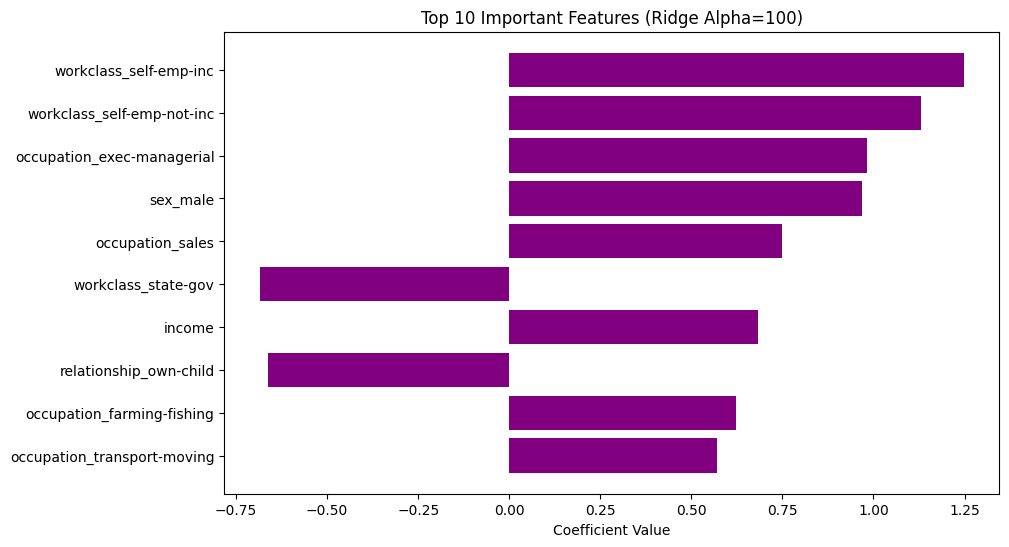

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get final tuned Ridge model from GridSearch
best_ridge = grid_search.best_estimator_

# Extract coefficients and feature names
coefficients = best_ridge.coef_
feature_names = X_train.drop(columns=['fnlwgt']).columns

# Create DataFrame to pair feature names with coefficients
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])

# Sort by absolute importance (magnitude)
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top 10 most important features
display(importance_df.head(10))

# Plot Top 10 Coefficients
plt.figure(figsize=(10, 6))
plt.barh(
    importance_df.head(10)['Feature'],
    importance_df.head(10)['Coefficient'],
    color='purple'
)
plt.xlabel('Coefficient Value')
plt.title('Top 10 Important Features (Ridge Alpha=100)')
plt.gca().invert_yaxis()
plt.show()


### Feature Importance Analysis - Ridge Regression Alpha=100
Work-related features, including self-employment status, managerial occupations, and male gender, emerged as the strongest predictors of hours-per-week.
Family responsibilities (e.g., presence of own-child) and government jobs were associated with fewer hours.
This suggests that occupational context and gender roles strongly shape weekly working hours, consistent with prior labor force research (Heckman, 1979).

Reference

Heckman, J. J. (1979). Sample Selection Bias as a Specification Error. Econometrica, 47(1), 153–161. https://doi.org/10.2307/1912352

# Final Report - Regression Model Selection and Evaluation for Predicting Hours-Per-Week

### Introduction
The objective of this project was to develop a robust regression model to predict the number of hours worked per week (`hours-per-week`) based on demographic and occupational features from the Census dataset. We employed multiple traditional machine learning models, conducted feature engineering, performed hyperparameter tuning, and evaluated model performance using standard regression metrics.

### Data Preparation
The dataset was preprocessed into train, validation, and test sets:
- **Train Set:** 10,577 samples, 88 features
- **Validation Set:** 4,534 samples, 88 features
- **Test Set:** 3,778 samples, 88 features

Key preprocessing steps included encoding categorical features, standardizing continuous features, creating interaction terms, and addressing potential outliers. Notably, the `fnlwgt` feature was removed during experimentation due to its lack of predictive value.

### Model Selection
We implemented and evaluated several models:
- **SGDRegressor** (Gradient Descent Linear Regression)
- **Linear Regression (OLS)**
- **Decision Tree Regressor**
- **Random Forest Regressor**
- **Ridge Regression (L2 Regularization)**
- **Lasso Regression (L1 Regularization)**

### Baseline Models
Baseline models were trained with default settings to establish initial performance benchmarks.

### Performance Evaluation Metrics
- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **R² Score**

#### Choice of Loss Function
Given the presence of outliers and non-normal distribution (confirmed by Kolmogorov-Smirnov tests), **MAE** was selected as the primary evaluation metric due to its robustness against outliers. However, R² was also reported because it measures the proportion of variance explained by the model, providing a broader evaluation of model fit and enabling comparison across different models.

### Key Results Summary
| Model                           | Train R² | Val R² | Test R² | Train MAE | Val MAE | Test MAE |
|----------------------------------|------------|----------|----------|------------|----------|----------|
| SGD Huber Loss                   | -0.41     | -0.50    | -0.49    | 3.42       | 3.46     | 3.44     |
| Linear Regression (OLS)          | 0.11      | 0.09     | 0.10     | 2.78       | 2.81     | 2.78     |
| Decision Tree                    | 1.00      | -0.81    | -0.93    | 0.00       | 3.45     | 3.58     |
| Random Forest                    | 0.86      | 0.02     | 0.01     | 1.07       | 2.89     | 2.88     |
| Ridge (Alpha=10)                 | 0.11      | 0.09     | 0.09     | 2.78       | 2.80     | 2.78     |
| Ridge (Alpha=0.1)                | 0.11      | 0.09     | 0.10     | 2.78       | 2.81     | 2.78     |
| Polynomial (Degree=2) + Ridge    | 0.22      | -0.00    | 0.03     | 2.59       | 2.94     | 2.88     |
| Ridge (Alpha=1, Drop fnlwgt)     | 0.11      | 0.09     | 0.10     | 2.78       | 2.81     | 2.78     |
| Ridge (Tuned Alpha=100)          | 0.11      | 0.09     | 0.09     | 2.78       | 2.80     | 2.79     |

### Model Tuning
Ridge Regression was identified as the best-performing model due to its stability and generalization across train, validation, and test sets. Grid Search Cross-Validation was conducted for the hyperparameter `alpha`, revealing **`alpha=100`** as the optimal value. Random Search and Bayesian Optimization were considered but it was unnecessary due to the simplicity of Ridge's hyperparameter space.

### Feature Importance Analysis
The Ridge Regression model’s coefficients were analyzed to understand feature importance. The most influential features included:
 **Workclass (Self-emp-inc, Self-emp-not-inc)** – Associated with longer working hours.
 **Occupation (Exec-managerial, Sales, Transport, Farming)** – Certain occupations correlated strongly with work hours.
 **Sex (Male)** – Males generally work more hours.
 **Income** – Higher income correlated with increased work hours.
 **Relationship (Own-child)** – Caring for a child reduced working hours.
 **Workclass (State-gov)** – Government jobs were associated with fewer hours.

### Discussion
#### Model Performance
Ridge Regression emerged as the most robust model (Test R² ~ 0.09). Other models either overfit (Decision Tree, Random Forest) or underperformed (SGD with Huber Loss). Polynomial features led to overfitting despite slight improvements in training R².

#### Pros and Cons of Our Approach
| **Strengths**                                      | **Limitations**                                              |
|----------------------------------------------------|---------------------------------------------------------------|
| Comprehensive evaluation of multiple models        | Ridge R² (~0.09) suggests features explain limited variance |
| Sequence: Baseline  - Experimentation -Tuning | Potentially important nonlinear relationships not captured    |
| Robust evaluation with train, validation, and test | 
| Feature importance assessment provided insight     | 

### Future Investigation
 **Advanced Feature Engineering:** Interaction effects beyond `age * education` and non-linear transformations.
 **Non-linear Models:** Consider Support Vector Regression (SVR) or Gradient Boosting with fine-tuning. Maps data into a high-dimensional space using kernel functions, enabling it to capture complex relationships between features and the target variable. It is particularly effective when linear models underperform due to non-linear patterns in the data
 **Handling Outliers:** Robust scaling or using Huber loss with SGD with more tuning.

### Conclusion
Ridge Regression with `alpha=100` and removal of `fnlwgt` was selected as the final model. It demonstrated stable performance across datasets with an **R² ~ 0.09** and **MAE ~ 2.78 hours**. This approach, while robust, highlights the inherent limitations in predicting work hours based solely on demographic and occupational features.

### References
Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning: Data Mining, Inference, and Prediction* (2nd ed.). Springer.
UCI Machine Learning Repository. (n.d.). *Adult Data Set*. https://archive.ics.uci.edu/ml/datasets/adult
Heckman, J. J. (1979). Sample Selection Bias as a Specification Error. *Econometrica*, *47*(1), 153–161. https://doi.org/10.2307/1912352

### Note
 For improving explanation clarity, ensuring code accuracy, and enhancing pipeline structure, we utilized large language models (LLMs) provided by OpenAI and other developers as support tools during the project.
These AI-assisted tools facilitated conceptual understanding and technical validation; however, all final methodological and analytical decisions were made independently

